2024-05-01 18:57:49.537675: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 18:57:49.537740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 18:57:49.539062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 18:57:49.548202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 18:57:50.999361: W tensorflow/compiler/tf2

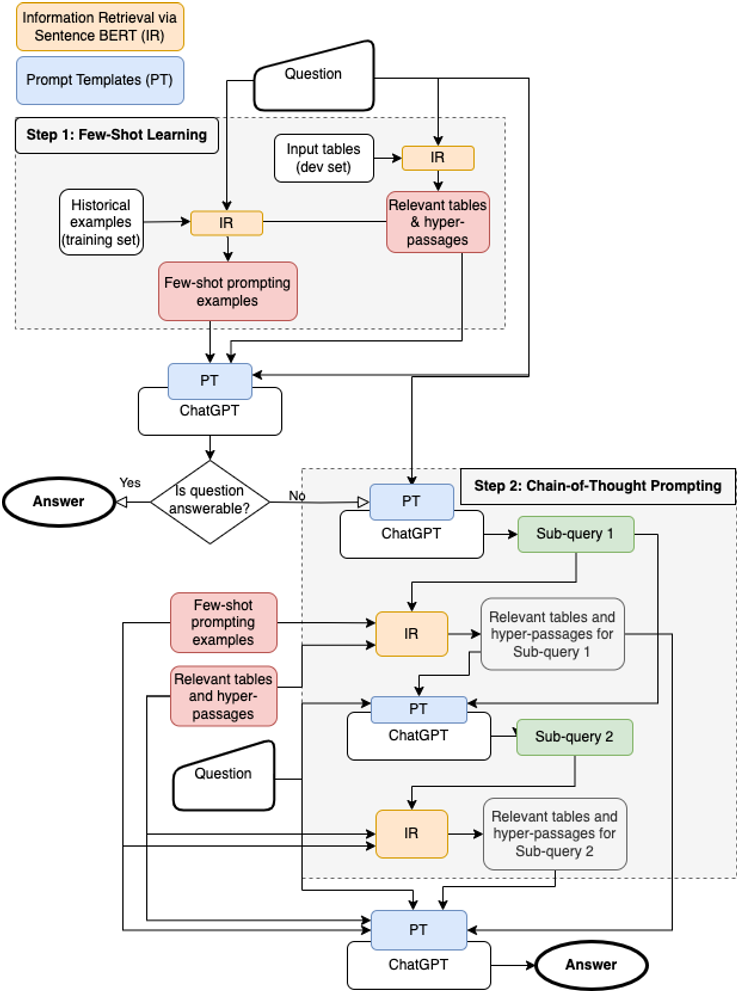

In [1]:
from PIL import Image
from torchvision import transforms
import torch
from transformers import ViTImageProcessor
from transformers import ViTForImageClassification, AutoFeatureExtractor
import requests
import io
from datasets import load_dataset
import pandas as pd
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import AutoImageProcessor
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision.transforms import ToPILImage
from PIL import Image
from sklearn.metrics import classification_report
from operator import itemgetter
from torchvision.transforms import Resize, Compose, ToTensor, Normalize, RandomResizedCrop
from transformers import AutoFeatureExtractor
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
import matplotlib.ticker as ticker
from transformers import AutoFeatureExtractor
from torch.utils.data import Dataset, DataLoader
import os
from transformers import DefaultDataCollator
import evaluate
from transformers import ViTImageProcessor
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
from transformers import AutoConfig, TFAutoModelForTableQuestionAnswering
from transformers import ViTForImageClassification
from transformers import AdamW, SwinForImageClassification
from torch.utils.data import DataLoader
import torch
from torch.nn.functional import softmax
from transformers import ViTForImageClassification, ViTFeatureExtractor
from transformers import TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import DefaultDataCollator
from torchvision.transforms import CenterCrop, Compose, Normalize, RandomHorizontalFlip,RandomResizedCrop, Resize, ToTensor



image = Image.open("/lstr/sahara/datalab-ml/z1974769/outputs_pdffigures/real_outputs/figure_images2403.19116-Figure2-1.png")
image

In [2]:
from transformers import AutoModelForImageClassification, AutoImageProcessor


swin_fine_tine = "/lstr/sahara/datalab-ml/z1974769/classifier/swin_classifier_results/checkpoint-536"
# image = Image.open("/lstr/sahara/datalab-ml/z1974769/outputs_pdffigures/real_outputs/figure_images1601.05647-Figure4-1.png")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

processor = AutoImageProcessor.from_pretrained(swin_fine_tine)
model = AutoModelForImageClassification.from_pretrained(swin_fine_tine)
inputs = processor(images=image, return_tensors="pt").to(device)
model.to(device)
pixel_values = inputs.pixel_values
with torch.no_grad():
  outputs = model(pixel_values)
logits = outputs.logits
prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

Predicted class: neural networks


In [3]:
images_path = "/lstr/sahara/datalab-ml/z1974769/outputs_pdffigures/real_outputs"

In [4]:
df = pd.read_json("/lstr/sahara/datalab-ml/z1974769/outputs_pdffigures/real_outputs/all_files_data_combined.json")

In [5]:
df["Fig_name"] = df["renderURL"].str.split("/").str[-1]

In [6]:
def get_prediction(row):
    img_path = row["renderURL"]
    image = Image.open(img_path)
    inputs = processor(images=image, return_tensors="pt").to(device)
    model.to(device)
    pixel_values = inputs.pixel_values
    with torch.no_grad():
        outputs = model(pixel_values)
    logits = outputs.logits
    prediction = logits.argmax(-1)
    return model.config.id2label[prediction.item()]

In [7]:
df["Predicted_class"] = df.apply(get_prediction, axis=1)

In [8]:
df

,imageText,name,page,figType,captionBoundary,renderDpi,renderURL,regionBoundary,caption,Fig_name,Predicted_class
0,"[Γ⇒, ∆;Π, N, −, cut, Γ⇒, ∆,, x, :, N;Π∗, x, :,...",3,14,Figure,"{'x1': 124.79974365234375, 'x2': 470.477355957...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 128.64, 'x2': 483.35999999999996, 'y1':...",Figure 3: Ecumenical pure modal system labEK. ...,figure_images2204.02076-Figure3-1.png,trees
1,"[Γ⇒, ∆;Π, N, −, cut, Γ⇒, ∆,N;Π∗, N,, Γ⇒, ∆;Π, ...",2,6,Figure,"{'x1': 124.80010986328125, 'x2': 468.516174316...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 145.92, 'x2': 446.88, 'y1': 447.84, 'y2...",Figure 2: Ecumenical pure system LCE. In rules...,figure_images2204.02076-Figure2-1.png,trees
2,"[∆1{, A•,, [A•,∆2]}, ∆1{, A•,, [∆2]}, •, Λ{[A◦...",5,21,Figure,"{'x1': 219.60032653808594, 'x2': 373.651062011...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 123.83999999999999, 'x2': 473.76, 'y1':...",Figure 5: Intuitionistic fragment nEKi.,figure_images2204.02076-Figure5-1.png,tables
3,"[Γ⊥, ◦, {P▽}, D, Λ{N▽,⊥◦}, Λ{N◦}, store, Γ∗{P▽...",6,21,Figure,"{'x1': 226.56011962890625, 'x2': 366.810882568...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 148.79999999999998, 'x2': 453.12, 'y1':...",Figure 6: Classical fragment nEKc.,figure_images2204.02076-Figure6-1.png,tables
4,"[4, :, A→, A, ∧, ♦♦A→, ♦A, Transitivity, ∀x,, ...",1,22,Table,"{'x1': 170.16000366210938, 'x2': 423.209594726...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 123.83999999999999, 'x2': 470.4, 'y1': ...",Table 1: Axioms and corresponding first-order ...,figure_images2204.02076-Table1-1.png,tables
...,...,...,...,...,...,...,...,...,...,...,...
37726,"[CPH, 74.34, (73.97,, 74.71), 82.79, (82.70,, ...",4,16,Table,"{'x1': 133.46400451660156, 'x2': 477.783142089...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 543.36, 'y2...",Table 4: The CIec values (%) of the compared m...,figure_images2203.00144-Table4-1.png,NLP text_grammar_eg
37727,"[CPH, 56.38, (56.08,, 56.65), 57.48, (57.37,, ...",3,16,Table,"{'x1': 133.46400451660156, 'x2': 477.785766601...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 365.76, 'y2...",Table 3: The CIee values (%) of the compared m...,figure_images2203.00144-Table3-1.png,NLP text_grammar_eg
37728,"[CPH, 72.91, (72.57,, 73.25), 78.37, (78.30,, ...",2,16,Table,"{'x1': 133.46400451660156, 'x2': 477.482330322...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 188.64, 'y2...",Table 2: The C-index (CI) values (%) of the co...,figure_images2203.00144-Table2-1.png,NLP text_grammar_eg
37729,"[SurVED, DeepSurv, DeepHit, DATE, VSI, CPH, RS...",3,19,Figure,"{'x1': 133.54800415039062, 'x2': 478.472991943...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 136.79999999999998, 'x2': 479.52, 'y1':...",Figure 3: The change of CI as the size of the ...,figure_images2203.00144-Figure3-1.png,Line graph_chart


In [ ]:
df.iloc[37727]["renderURL"]